# Лабораторная №2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train= pd.read_csv("/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Обработка пропусков в данных

Колонку "Cabin" можно удалить, так как количество пропусков практически 90%. Пропуски в колонке "Age" заполним медианой.Пропуски в "Embarked" заполним "S".

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.dropna(subset=["Cabin"], inplace=True)
med_age= train["Age"].median()
train["Age"]= train["Age"].fillna(med_age)
train["Embarked"]= train["Embarked"].fillna("S")

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Кодирование категориальных признаков

Используем кодирование меток (Label encoding) для колонок "Sex" и "Embarked"

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Fit and transform "Sex" column
train["Sex"] = le.fit_transform(train["Sex"])

# Fit and transform "Embarked" column
train["Embarked"] = le.fit_transform(train["Embarked"])

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,2


## Масштабирование

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

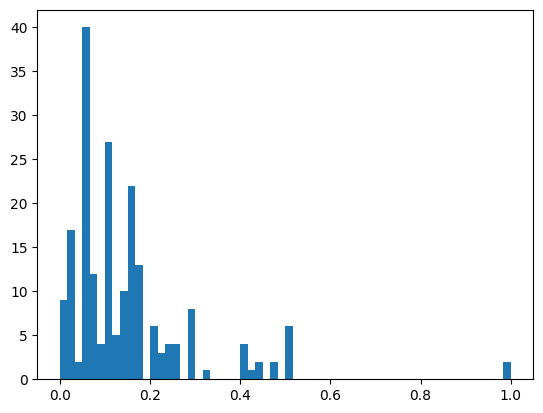

In [ ]:
sc1 = MinMaxScaler() #нормализация данных путем масштабирования
sc1_data = sc1.fit_transform(train[['Fare']]) #стандартизация признаков путем удаления среднего и масштабирования к единичной дисперсии.
plt.hist(sc1_data, 60)
plt.show()